<a href="https://colab.research.google.com/github/objectc/CNN-with-TensorFlow2.0-and-Keras/blob/master/reduce_overfitting_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

Load CIFAR10 using keras.datasets.cifar10.load_data()

In [0]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

Create traning set, validation set, test set

In [0]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0
sklearn.utils.shuffle(X_train_full, y_train_full)
X_train = X_train_full[0:-5000]
y_train = y_train_full[0:-5000]
X_valid = X_train_full[-5000:]
y_valid = y_train_full[-5000:]

In [0]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [8]:
X_train[0].shape

(32, 32, 3)

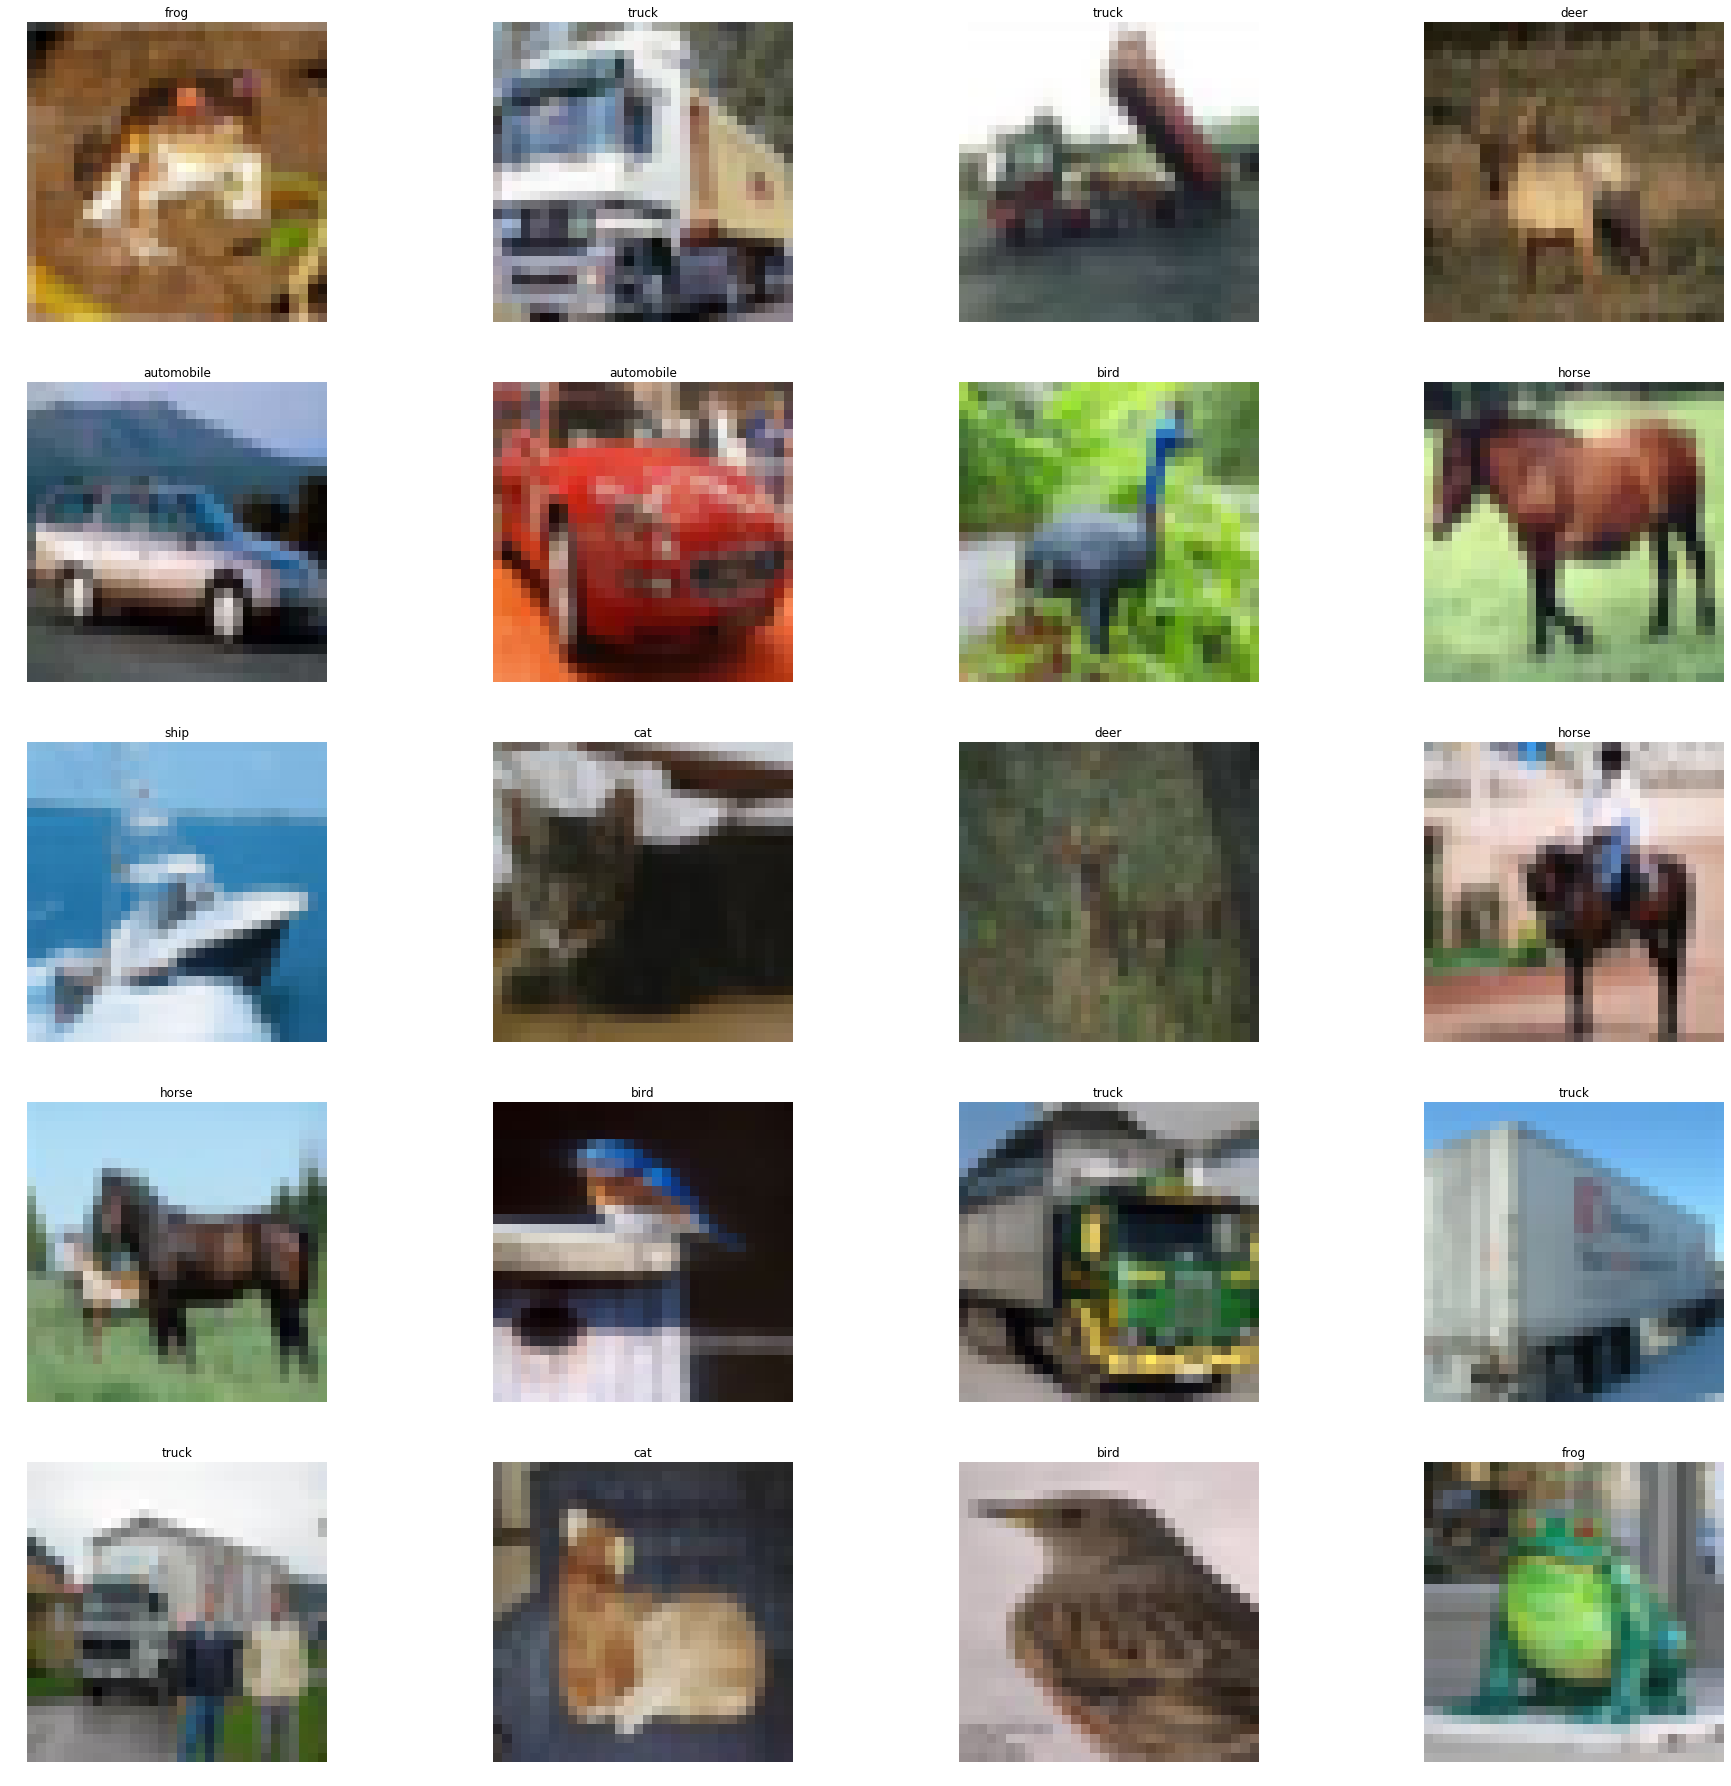

In [15]:
plt.figure(figsize=(32, 32), facecolor='white')
n_rows, n_cols = 5, 4
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        ax = plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])
        title = classes[np.squeeze(y_train[i])]
        ax.set_title(title, color = 'black')

In [0]:
def reset_weights(model):
    session = keras.backend.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

In [0]:
def plot_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['sparse_categorical_accuracy'])
  plt.plot(history.history['val_sparse_categorical_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validate'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validate'], loc='upper left')
  plt.show()

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 3)),
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(len(classes), activation=keras.activations.softmax)
    ]
)

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [0]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [0]:
reset_weights(model)

In [19]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 13s 278us/sample - loss: 1.3874 - sparse_categorical_accuracy: 0.4997 - val_loss: 1.0606 - val_sparse_categorical_accuracy: 0.6286
Epoch 2/20
45000/45000 [==============================] - 11s 253us/sample - loss: 0.9414 - sparse_categorical_accuracy: 0.6700 - val_loss: 0.8822 - val_sparse_categorical_accuracy: 0.6952
Epoch 3/20
45000/45000 [==============================] - 12s 268us/sample - loss: 0.7616 - sparse_categorical_accuracy: 0.7324 - val_loss: 0.7582 - val_sparse_categorical_accuracy: 0.7422
Epoch 4/20
45000/45000 [==============================] - 11s 238us/sample - loss: 0.6283 - sparse_categorical_accuracy: 0.7805 - val_loss: 0.7269 - val_sparse_categorical_accuracy: 0.7558
Epoch 5/20
45000/45000 [==============================] - 11s 243us/sample - loss: 0.5230 - sparse_categorical_accuracy: 0.8165 - val_loss: 0.7755 - val_sparse_categorical_accuracy: 0.7464
Epoch 

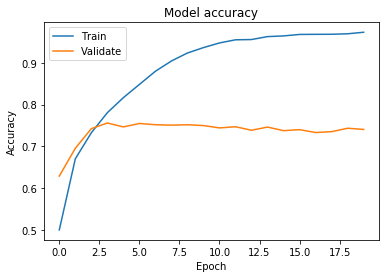

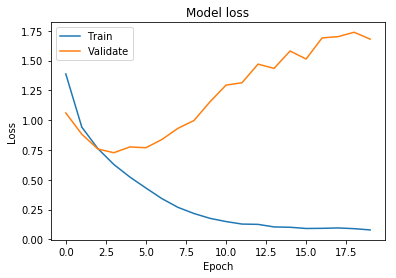

In [29]:
plot_history(history)

The plots of accuracy and loss  above indicate that the training is overfitting as the training resule keep going weel while the performance of the validation is geting stuck. So that we need to some methods to overcome overfitting. Here we use 5 ways:


1.   Earyly Stopping
2.   Data Augmentation
3.   Regularzation
4.   Batch Normalization
5.   Drop out



## Early Stopping
In keras, you can implement Early Stopping easily by passing it to the training callback. You can also cutomize your own callback.

In [0]:
reset_weights(model)

In [0]:
early_stopping_monitor = keras.callbacks.EarlyStopping(patience=2)

In [32]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=[early_stopping_monitor])

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 13s 282us/sample - loss: 1.6172 - sparse_categorical_accuracy: 0.4104 - val_loss: 1.2657 - val_sparse_categorical_accuracy: 0.5462
Epoch 2/20
45000/45000 [==============================] - 12s 257us/sample - loss: 1.1356 - sparse_categorical_accuracy: 0.5942 - val_loss: 1.0371 - val_sparse_categorical_accuracy: 0.6366
Epoch 3/20
45000/45000 [==============================] - 12s 264us/sample - loss: 0.9405 - sparse_categorical_accuracy: 0.6695 - val_loss: 0.9131 - val_sparse_categorical_accuracy: 0.6830
Epoch 4/20
45000/45000 [==============================] - 11s 238us/sample - loss: 0.8040 - sparse_categorical_accuracy: 0.7165 - val_loss: 0.8647 - val_sparse_categorical_accuracy: 0.7006
Epoch 5/20
45000/45000 [==============================] - 11s 241us/sample - loss: 0.6981 - sparse_categorical_accuracy: 0.7542 - val_loss: 0.7948 - val_sparse_categorical_accuracy: 0.7278
Epoch 

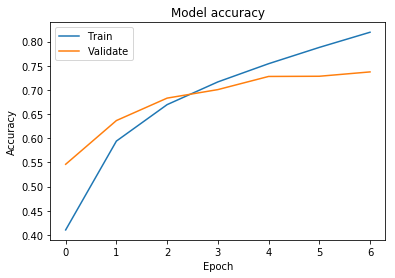

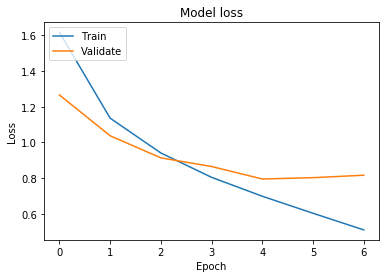

In [33]:
plot_history(history)

## Data Augmentation

In [0]:
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [0]:
X_train_gen = datagen.flow(X_train, y_train)

In [38]:
history = model.fit(X_train_gen, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 23s 17ms/step - loss: 0.8628 - sparse_categorical_accuracy: 0.6974 - val_loss: 0.8416 - val_sparse_categorical_accuracy: 0.7172
Epoch 2/20
1407/1407 [==============================] - 25s 18ms/step - loss: 0.8153 - sparse_categorical_accuracy: 0.7111 - val_loss: 0.7481 - val_sparse_categorical_accuracy: 0.7474
Epoch 3/20
1407/1407 [==============================] - 24s 17ms/step - loss: 0.7798 - sparse_categorical_accuracy: 0.7263 - val_loss: 0.7132 - val_sparse_categorical_accuracy: 0.7604
Epoch 4/20
1407/1407 [==============================] - 24s 17ms/step - loss: 0.7532 - sparse_categorical_accuracy: 0.7354 - val_loss: 0.7125 - val_sparse_categorical_accuracy: 0.7608
Epoch 5/20
1407/1407 [==============================] - 24s 17ms/step - loss: 0.7342 - sparse_categorical_accuracy: 0.7426 - val_loss: 0.6844 - val_sparse_categorical_accuracy: 0.7704
Epoch 6/20
1407/1407 [==============================] - 25s 18ms/step - loss: 0.

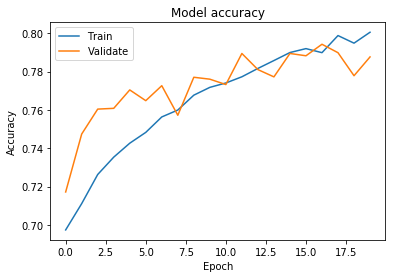

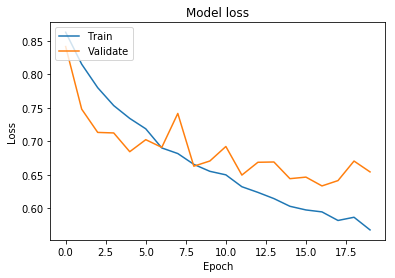

In [39]:
plot_history(history)

##  Batch Normalization

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 3)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(len(classes), activation=keras.activations.softmax)
    ]
)

In [42]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 16, 16, 64)        256       
__________

In [43]:
reset_weights(model)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 12s 267us/sample - loss: 1.2400 - sparse_categorical_accuracy: 0.5616 - val_loss: 0.9914 - val_sparse_categorical_accuracy: 0.6586
Epoch 2/20
45000/45000 [==============================] - 11s 251us/sample - loss: 0.8250 - sparse_categorical_accuracy: 0.7101 - val_loss: 0.9126 - val_sparse_categorical_accuracy: 0.6926
Epoch 3/20
45000/45000 [==============================] - 11s 252us/sample - loss: 0.6754 - sparse_categorical_accuracy: 0.7625 - val_loss: 0.7998 - val_sparse_categorical_accuracy: 0.7340
Epoch 4/20
45000/45000 [==============================] - 12s 256us/sample - loss: 0.5552 - sparse_categorical_accuracy: 0.8079 - val_loss: 0.7683 - val_sparse_categorical_accuracy: 0.7504
Epoch 5/20
45000/45000 [==============================] - 12s 276us/sample - loss: 0.4433 - sparse_categorical_accuracy: 0.8436 - val_loss: 0.7809 - val_sparse_categorical_accuracy: 0.7510
Epoch 

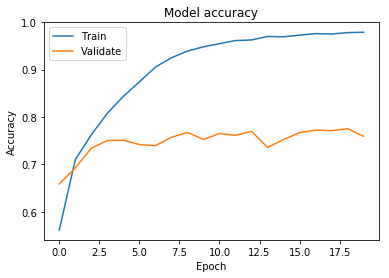

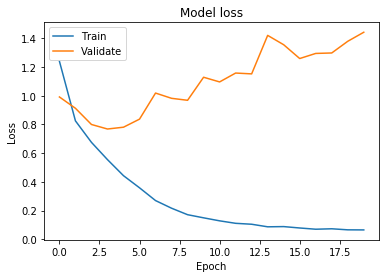

In [44]:
plot_history(history)

## Dropout
Recently, more and more 

In [46]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 3)),
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(len(classes), activation=keras.activations.softmax)
    ]
)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [47]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [48]:
reset_weights(model)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 10s 229us/sample - loss: 1.6677 - sparse_categorical_accuracy: 0.3867 - val_loss: 1.2375 - val_sparse_categorical_accuracy: 0.5674
Epoch 2/20
45000/45000 [==============================] - 10s 220us/sample - loss: 1.2899 - sparse_categorical_accuracy: 0.5407 - val_loss: 1.0402 - val_sparse_categorical_accuracy: 0.6314
Epoch 3/20
45000/45000 [==============================] - 10s 222us/sample - loss: 1.1309 - sparse_categorical_accuracy: 0.5980 - val_loss: 0.9053 - val_sparse_categorical_accuracy: 0.6906
Epoch 4/20
45000/45000 [==============================] - 10s 218us/sample - loss: 1.0196 - sparse_categorical_accuracy: 0.6406 - val_loss: 0.8224 - val_sparse_categorical_accuracy: 0.7132
Epoch 5/20
45000/45000 [==============================] - 9s 211us/sample - loss: 0.9442 - sparse_categorical_accuracy: 0.6696 - val_loss: 0.7739 - val_sparse_categorical_accuracy: 0.7314
Epoch 6

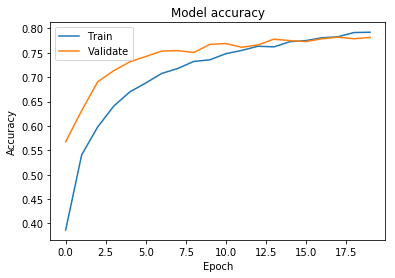

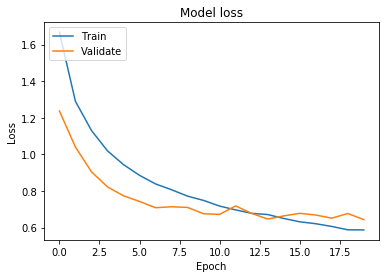

In [49]:
plot_history(history)

In [0]:
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu, input_shape=(32, 32, 3), kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Conv2D(32, (3,3), padding='same', activation=keras.activations.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Conv2D(64, (3,3), padding='same', activation=keras.activations.relu, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(len(classes), activation=keras.activations.softmax)
    ]
)

In [72]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.sparse_categorical_crossentropy, 
              metrics=[keras.metrics.sparse_categorical_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
__________

In [0]:
reset_weights(model)

In [74]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Train on 45000 samples, validate on 5000 samples
Epoch 1/40
45000/45000 [==============================] - 11s 245us/sample - loss: 1.6051 - sparse_categorical_accuracy: 0.4625 - val_loss: 1.3763 - val_sparse_categorical_accuracy: 0.5528
Epoch 2/40
45000/45000 [==============================] - 10s 229us/sample - loss: 1.2670 - sparse_categorical_accuracy: 0.6040 - val_loss: 1.1917 - val_sparse_categorical_accuracy: 0.6346
Epoch 3/40
45000/45000 [==============================] - 11s 238us/sample - loss: 1.1442 - sparse_categorical_accuracy: 0.6610 - val_loss: 1.1292 - val_sparse_categorical_accuracy: 0.6654
Epoch 4/40
45000/45000 [==============================] - 10s 230us/sample - loss: 1.0600 - sparse_categorical_accuracy: 0.6989 - val_loss: 1.0582 - val_sparse_categorical_accuracy: 0.7024
Epoch 5/40
45000/45000 [==============================] - 11s 255us/sample - loss: 1.0108 - sparse_categorical_accuracy: 0.7219 - val_loss: 1.0582 - val_sparse_categorical_accuracy: 0.7146
Epoch 

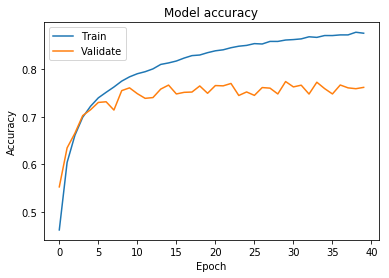

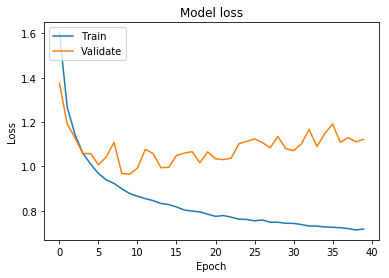

In [76]:
plot_history(history)